In [5]:
# -*- coding: utf-8 -*-
from sklearn import datasets, naive_bayes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import  numpy as np

digits = datasets.load_digits()  # 加载 scikit-learn 自带的 digits 数据集
X_train, X_test, y_train, y_test =  train_test_split(digits.data, 
                                                     digits.target,
                                                     test_size=0.3, 
                                                     random_state=1,
                                                     stratify=digits.target)

In [10]:
cls = naive_bayes.MultinomialNB(alpha=0)
cls.fit(X_train, y_train)

print("每个类别数量:", (cls.class_count_))
print("每个类别调整前的概率:", (cls.class_count_/(cls.class_count_.sum()))[:3])
print("每个类别调整后的概率:", (np.exp(cls.class_log_prior_))[:3])
print('alpha = 0 测试集得分: %.2f' % cls.score(X_test, y_test))

每个类别数量: [124. 127. 124. 128. 127. 127. 127. 125. 122. 126.]
每个类别调整前的概率: [0.09864757 0.10103421 0.09864757]
每个类别调整后的概率: [0.09864757 0.10103421 0.09864757]
alpha = 0 测试集得分: 0.10


E:\software\anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


In [11]:
cls1 = naive_bayes.MultinomialNB() # 默认情况 alpha=1,拉普拉斯平滑
cls1.fit(X_train, y_train)

print("每个类别数量:", (cls1.class_count_))
print("每个类别调整前的概率:", (cls1.class_count_/(cls1.class_count_.sum()))[:3])
print("每个类别调整后的概率:", (np.exp(cls1.class_log_prior_))[:3])
print('alpha = 1 测试集得分: %.2f' % cls1.score(X_test, y_test))

每个类别数量: [124. 127. 124. 128. 127. 127. 127. 125. 122. 126.]
每个类别调整前的概率: [0.09864757 0.10103421 0.09864757]
每个类别调整后的概率: [0.09864757 0.10103421 0.09864757]
alpha = 1 测试集得分: 0.90


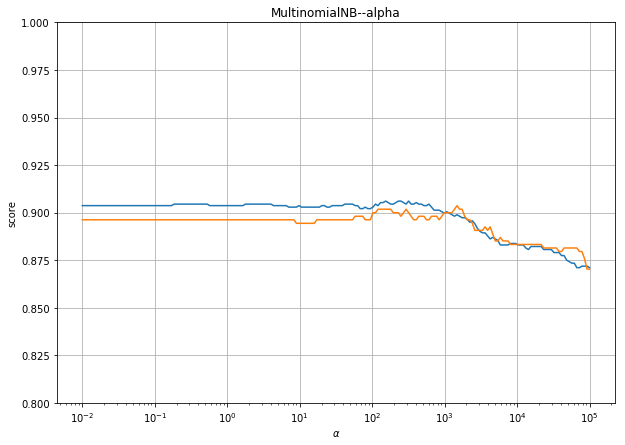

In [4]:
def test_MultinomialNB_alpha(*data):
    '''
    性能随 alpha 参数的影响
    '''
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-2, 5, num=200)
    train_scores = []
    test_scores = []
    for alpha in alphas:
        cls = naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))

    ## 绘图
    fig = plt.figure(figsize=(10,  7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, train_scores, label="Training Score")
    ax.plot(alphas, test_scores, label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0.8, 1.0)
    ax.set_title("MultinomialNB--alpha")
    ax.set_xscale("log")
    ax.grid(True)
    plt.show()
    
test_MultinomialNB_alpha(X_train, X_test, y_train, y_test)